In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('heart.csv')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print(df.describe())
print(df.isnull().sum())
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.info()

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

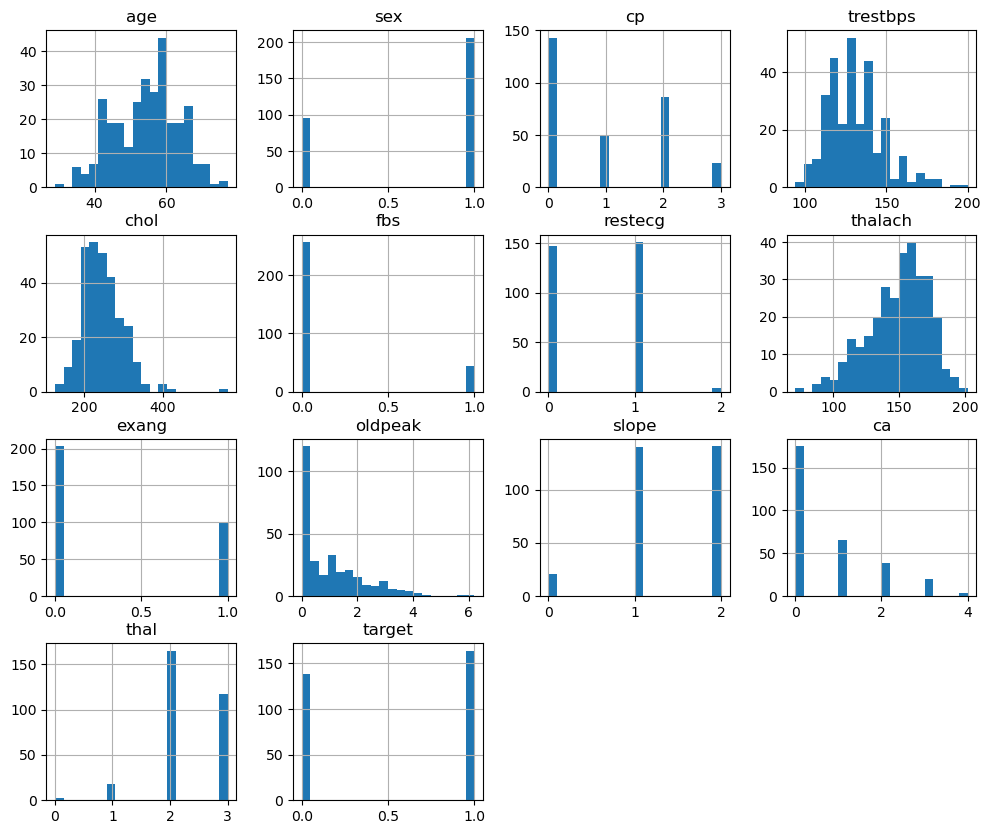

In [6]:
df.hist(figsize=(12, 10), bins=20)

In [7]:
x = df.drop('target', axis=1)
y = df['target']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16, stratify=y)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [11]:
# testing data model Evalution

def model_eval(model, x, y):
    y_pred = model.predict(x)

    ac = accuracy_score(y, y_pred)
    print(f"Accuracy Score= {ac}")

    cm = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix = \n{cm}")

    cr = classification_report(y, y_pred)
    print(f"Classification report = \n{cr}")

    return "Model Evaluation Success"


model_eval(knn_model, x_train, y_train)

Accuracy Score= 0.7842323651452282
Confusion Matrix = 
[[ 82  28]
 [ 24 107]]
Classification report = 
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       110
           1       0.79      0.82      0.80       131

    accuracy                           0.78       241
   macro avg       0.78      0.78      0.78       241
weighted avg       0.78      0.78      0.78       241



'Model Evaluation Success'

In [12]:
x_min=df['age'].min()
x_max=df['age'].max()

In [13]:
x_new=(x-x_min)/(x_max-x_min)

In [14]:
x=63
norm=(x-x_min)/(x_max-x_min)
norm

0.7083333333333334

In [15]:
df['norm_age'] =(df['age'] -x_min)/(x_max-x_min)

In [16]:
df[['age','norm_age']]

,age,norm_age
0,63,0.708333
1,37,0.166667
2,41,0.250000
3,56,0.562500
4,57,0.583333
...,...,...
298,57,0.583333
299,45,0.333333
300,68,0.812500
301,57,0.583333
